### Primeiros testes com o grafos

In [1]:
import os, sys
import json
import random
from termcolor import cprint
import networkx as nx

In [2]:
files = os.listdir('files')
colors = ['red', 'green', 'cyan', 'magenta', 'blue']
works = []

In [3]:
# Cria o objeto work [:10001]
for file in files[:200001]:
    with open('files/'+file, 'r') as f:
        try:
            tmp_json = json.load(f)
            if tmp_json and tmp_json.get('relations') != None:          
#             print(tmp_json)
                works.append(tmp_json)
        except:
            print(repr(f))
            print(sys.exc_info())

<_io.TextIOWrapper name='files/d8b62b31-22f7-4b63-af52-c5aea6715265.json' mode='r' encoding='UTF-8'>
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError('Expecting value: line 1 column 1 (char 0)'), <traceback object at 0x7f5da204eb48>)
<_io.TextIOWrapper name='files/82095e26-0e4d-4334-ae72-d75a68b525da.json' mode='r' encoding='UTF-8'>
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError('Expecting value: line 1 column 1 (char 0)'), <traceback object at 0x7f5da204ef88>)
<_io.TextIOWrapper name='files/b88424d9-8787-4833-9d33-2f4b0dbcf8e7.json' mode='r' encoding='UTF-8'>
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError('Expecting value: line 1 column 1 (char 0)'), <traceback object at 0x7f5da204efc8>)
<_io.TextIOWrapper name='files/a729f265-1c07-4094-ae89-cb17f8111359.json' mode='r' encoding='UTF-8'>
(<class 'json.decoder.JSONDecodeError'>, JSONDecodeError('Expecting value: line 1 column 1 (char 0)'), <traceback object at 0x7f5da204ef08>)
<_io.TextIOWrapper name='files/5

In [4]:
# for work in works:    
#     if not work.get('id') == None:        
        
#         color = random.choice(colors)    
#         cprint((work.get('id'),work.get('title')), color=color)
# #         cprint( color)
            
#         for titular in work['relations']:
#             if not titular.get('type') == 'performance':
#                 cprint((titular['artist']['name'], "==>", titular['type']), color)         
                

In [5]:
# Retonar todos os compositores de uma obra
# Refazer para fazer a busca pelo ID da OBRA.
def get_list_titular(work_title):
    list_tit = []
    
    for work in works:    
        if work.get('title') == work_title:
             for titular in work['relations']:
                if not titular.get('type') == 'performance':
                    list_tit.append(titular['artist']['name'])
    return list(set(list_tit))
    

In [6]:
print(get_list_titular('Bulls on Parade')) 
print(get_list_titular('Γυρίζω τις πλάτες μου στο μέλλον'))
print(get_list_titular('Block Party'))

['Tim Commerford', 'Tom Morello', 'Brad Wilk', 'Zack de la Rocha']
['Διονύσης Τσακνής']
['Big Little Dipper Dipper']


In [7]:
for i in tmp_json['relations']:
    print(i)

{'target-type': 'recording', 'ended': False, 'attribute-ids': {}, 'source-credit': '', 'target-credit': '', 'type': 'performance', 'attribute-values': {}, 'end': None, 'recording': {'disambiguation': '', 'video': False, 'length': 190934, 'title': 'Que tú me culpes (aires de Mirabrás)', 'id': '8f639981-5ea2-4368-b8f4-65f9252e4146'}, 'direction': 'backward', 'begin': None, 'attributes': [], 'type-id': 'a3005666-a872-32c3-ad06-98af558e99b0'}
{'type': 'writer', 'target-credit': '', 'source-credit': '', 'attribute-ids': {}, 'ended': False, 'target-type': 'artist', 'type-id': 'a255bca1-b157-4518-9108-7b147dc3fc68', 'attributes': [], 'artist': {'name': '[traditional]', 'id': '9be7f096-97ec-4615-8957-8d40b5dcbc41', 'disambiguation': 'Special Purpose Artist', 'sort-name': '[traditional]'}, 'direction': 'backward', 'begin': None, 'end': None, 'attribute-values': {}}


In [8]:
# Retorna uma lista com todas obras em que o artista é compositor
# Tenho que refazer e fazer a busca pelo id do artista
def get_all_work_by_artist(artist):
    tmp_works = []
    
    for work in works:
        for art in work['relations']:            
            if not art.get('type') == 'performance' and art['artist']['name'] == artist:
                tmp_works.append(work['title'])
    return list(set(tmp_works))
    

In [9]:
# Robert Smith
# t = get_all_work_by_artist('Tom Morello')
obras = get_all_work_by_artist('Zack de la Rocha')
# t = get_all_work_by_artist('Robert Smith')

obras

['Born as Ghosts',
 'Maria',
 'Bullet in the Head',
 'Calm Like a Bomb',
 'Dragons Lair, Part 2 (Testify Now)',
 'No Shelter',
 'Born of a Broken Man',
 'War Within a Breath',
 'Mic Check',
 'Vietnow',
 'Voice of the Voiceless',
 'Bulls on Parade']

In [10]:
for i in obras:
    print('**', i, '**')
    for j in get_list_titular(i):
        print(j)

** Born as Ghosts **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Rocha
** Maria **
Brad Wilk
Michael Boden
French Thompson
David Sylvian
Tom Morello
Lennaert Nijgh
Jimmy Destri
Astrid Nijgh
Colin Hay
Zack de la Rocha
Richard Rodgers
Tim Commerford
Werner Widmer
林保徳
Johan Ledoux
Max Coppella
Guillaume Ledoux
Oscar Hammerstein II
Mats Paulson
Ingo Hampf
Henri
** Bullet in the Head **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Rocha
** Calm Like a Bomb **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Rocha
** Dragons Lair, Part 2 (Testify Now) **
Rob Hubbard
Zack de la Rocha
** No Shelter **
Jacob Portrait
Brad Wilk
Zack de la Rocha
Tim Commerford
Charlie Hilton
Tom Morello
** Born of a Broken Man **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Rocha
** War Within a Breath **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Rocha
** Mic Check **
Brad Wilk
Zack de la Rocha
Imogen Heap
Tim Commerford
Tom Morello
** Vietnow **
Tim Commerford
Tom Morello
Brad Wilk
Zack de la Roch

In [11]:
# retornar uma lista com todos os artitas com quem o artistas compos 
def get_list_artist_by_artist(artist):
    list_art = []
    
    all_works_of_art = get_all_work_by_artist(artist)    
    
    for work in all_works_of_art:    
        for wk in works:
#           sem tratamento de obras homônimas 
            if work == wk['title']:
               for tit in get_list_titular(wk['title']):
                list_art.append(tit)

    return list(set(list_art))

In [12]:
ed = [('Zack de la Rocha', 'Werner Widmer'), ('Zack de la Rocha', 'Tom Morello'), ('Zack de la Rocha', 'Charlie Hilton'), ('Zack de la Rocha', 'Tim Commerford'), ('Zack de la Rocha', 'Richard Rodgers'), ('Zack de la Rocha', 'Oscar Hammerstein II'), ('Zack de la Rocha', 'David Sylvian'), ('Zack de la Rocha', 'Max Coppella'), ('Zack de la Rocha', 'Johan Ledoux'), ('Zack de la Rocha', 'Astrid Nijgh'), ('Zack de la Rocha', 'Lennaert Nijgh'), ('Zack de la Rocha', '林保徳'), ('Zack de la Rocha', 'Guillaume Ledoux'), ('Zack de la Rocha', 'Henri'), ('Zack de la Rocha', 'Ingo Hampf'), ('Zack de la Rocha', 'Jimmy Destri'), ('Zack de la Rocha', 'Mats Paulson'), ('Zack de la Rocha', 'French Thompson'), ('Zack de la Rocha', 'Jacob Portrait'), ('Zack de la Rocha', 'Michael Boden'), ('Zack de la Rocha', 'Colin Hay'), ('Zack de la Rocha', 'Zack de la Rocha'), ('Zack de la Rocha', 'Brad Wilk'), ('Zack de la Rocha', 'Imogen Heap'), ('Zack de la Rocha', 'Rob Hubbard')]
ed2 = [('Spanish Caravan', ' John Densmore'),
 ('Spanish Caravan', ' Jim Morrison'),
 ('Spanish Caravan', ' Robby Krieger'),
 ('Spanish Caravan', ' Ray Manzarek'),
 ('1 John 4:16', ' John Darnielle'),
 ('Goddess (of the Sad Man)', ' Pasi Koskinen'),
 ('Goddess (of the Sad Man)', ' Amorphis'),
 ('來生緣', ' 胡偉立'),
 ('來生緣', ' 劉德華'),
 ('Still Wandering', ' Sieudiver'),
 ('The Night Is Over', ' Pasi Koskinen'),
 ('The Night Is Over', ' Amorphis'),
 ('I Had a Dream', ' Dennis Belfield'),
 ('I Had a Dream', ' Joey Carbone'),
 ('I Had a Dream', ' John Sebastian'),
 ('Fareweel Regality', ' Terry Conway'),
 ('Fool’s Errand', ' Robin Pecknold'),
 ('Carve My Name Into Your Chest', ' Patty Reece'),
 ('Carve My Name Into Your Chest', ' Izabelle Steele'),
 ('Carve My Name Into Your Chest', ' Pudjun'),
 ('Carve My Name Into Your Chest', ' Danyell DeVille'),
 ('GOOD LUCK MY WAY', ' HYDE'),
 ('GOOD LUCK MY WAY', ' TETSUYA'),
 ('Bulls on Parade', ' Zack de la Rocha'),
 ('Bulls on Parade', ' Tim Commerford'),
 ('Bulls on Parade', ' Tom Morello'),
 ('Bulls on Parade', ' Brad Wilk'),
 ("Knock 'em Out", ' Darren Lewis'),
 ("Knock 'em Out", ' Iyiola Babalola'),
 ("Knock 'em Out", ' Earl King'),
 ("Knock 'em Out", ' Lily Allen'),
 ('Honeysuckle', ' Stefano Musso'),
 ('1!2!3!4! ヨロシク!', ' 秋元康'),
 ('1!2!3!4! ヨロシク!', ' ツキダタダシ'),
 ('18', ' Lucy'),
 ('18', ' azu'),
 ('18', ' Moby'),
 ('Burning in Hell', ' Jeff Becerra'),
 ('Burning in Hell', ' Mike Torrao'),
 ('The Narcotic Suite: 3 Kilos', ' Liam Howlett'),
 ("Το σ' αγαπώ δεν το λέω σε κανένα (Το σ' αγαπώ το κρατάω για σένα)",
  ' Τάκης Μουσαφίρης'),
 ('Γυρίζω τις πλάτες μου στο μέλλον', ' Διονύσης Τσακνής'),
 ('月光', ' 平田純子'),
 ('月光', ' HIRON'),
 ('月光', ' 鬼束ちひろ'),
 ('月光', ' Tatsh'),
 ('Sowing Season', ' Jesse Lacey'),
 ('Sowing Season', ' Vincent Accardi'),
 ('Propeller Seeds', ' Imogen Heap'),
 ('I hear you everywhere', ' かの香織'),
 ('Песня леди Джейн', ' Александр Зацепин'),
 ('Песня леди Джейн', ' Римма Казакова'),
 ('Песня леди Джейн', ' Леонид Дербенёв'),
 ('Στην υπόγα', ' Α. Κωστής'),
 ('Too Hot', ' Brian Leiser'),
 ('Too Hot', ' Ray Davies'),
 ('Too Hot', ' Leslie Howe'),
 ('Too Hot', ' Huey Morgan'),
 ('Too Hot', ' Alanis Morissette'),
 ('When the Laughter Is Over', ' Corinne Drewery'),
 ('When the Laughter Is Over', " Paul Staveley O'Duffy"),
 ('When the Laughter Is Over', ' Andy Connell'),
 ('Trust', ' Porl Thompson'),
 ('Trust', ' 彩音'),
 ('Trust', ' Jori Hulkkonen'),
 ('Trust', ' Perry Bamonte'),
 ('Trust', ' Simon Gallup'),
 ('Trust', ' 小室哲哉'),
 ('Trust', ' Juho Paalosmaa'),
 ('Trust', ' 清水達也'),
 ('Trust', ' Robert Smith'),
 ('Trust', ' Guano Apes'),
 ('Trust', ' Sandra Nasić'),
 ('Trust', ' Boris Williams'),
 ('Trust', ' BONNIE PINK'),
 ('Kölyköd voltam', ' Slamovits István'),
 ('Az utolsó magyar playboy 1.', ' Legát Tibor'),
 ('Az utolsó magyar playboy 1.', ' Tóth László'),
 ('L’Enterrement de Paul Fort', ' Koen De Cauter'),
 ('L’Enterrement de Paul Fort', ' Georges Brassens'),
 ('Bring Back My Happiness', ' Moby'),
 ('Eumenides', ' Daniel Copeman'),
 ('Eumenides', ' Thomas Fisher'),
 ('Eumenides', ' Rachel Davies'),
 ('Skeleton Swoon', ' Daniel Copeman'),
 ('Skeleton Swoon', ' Thomas Fisher'),
 ('Skeleton Swoon', ' Rachel Davies'),
 ('JUMP', ' 小室哲哉'),
 ('JUMP', ' 渡辺美里'),
 ('JUMP', ' 高見沢俊彦'),
 ('JUMP', ' つんく♂'),
 ('JUMP', ' 桑田佳祐'),
 ('Early in the Morning', ' Eric Clapton'),
 ('Early in the Morning', ' Louis Jordan'),
 ('Early in the Morning', ' Dallas Bartley'),
 ('Early in the Morning', ' Charlie Wilson'),
 ('Early in the Morning', ' [traditional]'),
 ('Early in the Morning', ' Lonnie Simmons'),
 ('Early in the Morning', ' Woody Harris'),
 ('Early in the Morning', ' Jimmy Page'),
 ('Early in the Morning', ' Rudy Taylor'),
 ('Early in the Morning', ' Bobby Darin'),
 ('Early in the Morning', ' Edward Seago'),
 ('Early in the Morning', ' Leo Hickman'),
 ('Early in the Morning', ' Mike Leander'),
 ('Precious', ' pal@pop'),
 ('Precious', ' Paul Weller'),
 ('Precious', ' Annie Lennox'),
 ('Precious', ' 長沼良'),
 ('Precious', ' 飯田建彦'),
 ('Precious', ' 漆野淳哉'),
 ('Precious', ' Martin L. Gore'),
 ('Precious', ' 恋-REN-'),
 ('NO‐NO‐YEAH / GO‐GO‐YEAH', ' 桑田佳祐'),
 ('大好きだよ', ' 若林充'),
 ('大好きだよ', ' 瀬名恵'),
 ('六等星の夜', ' aimerrhythm'),
 ('六等星の夜', ' 飛内将大'),
 ('La Nuit', ' S Petit Nico'),
 ('La Nuit', ' Thierry Sobézyk'),
 ('La Nuit', ' Adamo'),
 ('La Nuit', ' Pascale Macé'),
 ('La Nuit', ' Nicolas Stawski'),
 ('La Nuit', ' Philippe Planchon'),
 ('Watch You Bleed', ' Zoltan Bathory'),
 ('Watch You Bleed', ' Kevin Churko'),
 ('Watch You Bleed', ' Ivan Moody'),
 ('Watch You Bleed', ' Jeremy Spencer'),
 ('Watch You Bleed', ' Jason Hook'),
 ('Hate That I Love You', ' Mikkel Storleer Eriksen'),
 ('Hate That I Love You', ' Tor Erik Hermansen'),
 ('Hate That I Love You', ' Shaffer Chimere Smith'),
 ('stone cold', ' 梶浦由記'),
 ('The Becoming', ' Trent Reznor'),
 ('Драконография', ' Александр Зацепин'),
 ('Драконография', ' Римма Казакова'),
 ('Драконография', ' Леонид Дербенёв'),
 ('愛すべき未来へ', ' EXILE ATSUSHI'),
 ('愛すべき未来へ', ' 宅見将典'),
 ('(Die Frau hat) Rhythmus', ' Daniel "Dän" Dickopf'),
 ('LDN', ' Darren Lewis'),
 ('LDN', ' Iyiola Babalola'),
 ('LDN', ' Duke Reid'),
 ('LDN', ' Lily Allen'),
 ("Love Won't Let You Down", ' Corinne Drewery'),
 ("Love Won't Let You Down", " Paul Staveley O'Duffy"),
 ("Love Won't Let You Down", ' Andy Connell'),
 ('Money', ' Günter Schulz'),
 ('Money', ' Martin Sjølie'),
 ('Money', ' Sascha Konietzko'),
 ('Money', ' Brett Anderson'),
 ('Money', ' Ian Broudie'),
 ('Money', ' Maria Mena'),
 ('Money', ' Roger Waters'),
 ('Money', ' En Esch'),
 ('Money', ' Danyell DeVille'),
 ('Money', ' Billy Lunn'),
 ('Money', ' Richard Oakes'),
 ('Money', ' Dave Parsons'),
 ('Money', ' Jimmy Pursey'),
 ('Money', ' Ash Grunwald'),
 ('Money', ' The Subways'),
 ('Money', ' Pete Shelley'),
 ('TWO ROSES', ' 秋元康'),
 ('TWO ROSES', ' 大貫和紀'),
 ('Coast of Marseilles', ' Keith Sykes'),
 ('Le Gant', ' Koen De Cauter'),
 ('Le Gant', ' Sully Prudhomme'),
 ('Out in the Twilight', ' Rob Cantor'),
 ('Shatters Within', ' Pasi Koskinen'),
 ('Shatters Within', ' Amorphis'),
 ('A Minor Place', ' Will Oldham'),
 ('Circle the Drain', ' Christopher Stewart'),
 ('Circle the Drain', ' Lamont Neuble'),
 ('Circle the Drain', ' Katy Perry'),
 ('Millstone', ' Jesse Lacey'),
 ('君+謎+私でJUMP!!', ' 畑亜貴'),
 ('君+謎+私でJUMP!!', ' 高瀬一矢'),
 ('Never Meant to Know', ' Rob Cantor'),
 ('Tình đã phai', ' 胡偉立'),
 ('Чарльстон', ' Александр Зацепин'),
 ('Чарльстон', ' Римма Казакова'),
 ('Чарльстон', ' Леонид Дербенёв'),
 ('Stray Bullet', ' Huey Morgan'),
 ('Stray Bullet', ' Brian Leiser'),
 ("(I Know) It's Just the Same", ' Andrew Horowitz'),
 ("Για να σ' εκδικηθώ", ' Λάκης Παπαδόπουλος'),
 ("Για να σ' εκδικηθώ", ' Κυριάκος Ντούμος'),
 ('Doing the Unstuck', ' Porl Thompson'),
 ('Doing the Unstuck', ' Perry Bamonte'),
 ('Doing the Unstuck', ' Simon Gallup'),
 ('Doing the Unstuck', ' Robert Smith'),
 ('Doing the Unstuck', ' Boris Williams'),
 ('Innamorato', ' Stefano Musso'),
 ("Κάν' τονε Σταύρο, κάν' τονε", ' Μάρκος Βαμβακάρης'),
 ('Πέντε Έλληνες στον Άδη', ' Κώστας Μάνεσης'),
 ('Πέντε Έλληνες στον Άδη', ' Γιάννης Παπαϊωάννου'),
 ('The Night Has a Thousand Eyes', ' Buddy Bernier'),
 ('The Night Has a Thousand Eyes', ' Jerry Brainin'),
 ('Azóta mások a szerepek', ' Legát Tibor'),
 ('Azóta mások a szerepek', ' Tóth László'),
 ('She Said', ' Robin Proper-Sheppard'),
 ('She Said', ' Ed Roland'),
 ('She Said', ' Holly Golightly'),
 ('She Said', ' Jérôme Avril'),
 ('She Said', ' Ron Austin'),
 ('She Said', ' Ben Drew'),
 ('She Said', ' Christian Kolonovits'),
 ('She Said', ' Jimmy Fernandez'),
 ('She Said', ' Crispin Hunt'),
 ('She Said', ' Klaus Meine'),
 ('CESTREE', ' かの香織'),
 ('Uptown Blues', ' Jimmie Lunceford'),
 ('バレンタイン・キッス', ' 秋元康'),
 ('バレンタイン・キッス', ' 瀬井広明'),
 ('Ζωή νταλίκα κόκκινη', ' Σταμάτης Κραουνάκης'),
 ("Everything's Just Wonderful", ' Greg Kurstin'),
 ("Everything's Just Wonderful", ' Lily Allen'),
 ('Where Our Love Grows', ' Corinne Drewery'),
 ('Where Our Love Grows', " Paul Staveley O'Duffy"),
 ('Where Our Love Grows', ' Andy Connell'),
 ('Meet the Creeper', ' Rob Zombie'),
 ('Meet the Creeper', ' Scott Humphrey'),
 ('Never Love Anything', ' Izabelle Steele'),
 ('Never Love Anything', ' Danyell DeVille'),
 ('The Last Line', ' Keith Sykes'),
 ('Sawdust in the Blood', ' Rob Zombie'),
 ('Sawdust in the Blood', ' John 5'),
 ('Sawdust in the Blood', ' Scott Humphrey'),
 ('Rumore', ' Guido Maria Ferilli'),
 ('Rumore', ' Andrea Lo Vecchio'),
 ('you are my love', ' 梶浦由記'),
 ('Brand-new Sky', ' pal@pop'),
 ('Dark Lady', ' Uli Jon Roth'),
 ('Virtual Friend', ' Benno de Goeij'),
 ('Virtual Friend', ' Armin van Buuren'),
 ('Virtual Friend', ' Guy Chambers'),
 ('Drugs Party in 526', ' Colin Abrahall'),
 ('Drugs Party in 526', ' Colin Blyth'),
 ('Drugs Party in 526', ' Ross Lomas'),
 ('Drugs Party in 526', ' Andrew Williams'),
 ('As Tears Go By', ' Mick Jagger'),
 ('As Tears Go By', ' Andrew Loog Oldham'),
 ('As Tears Go By', ' Keith Richards'),
 ('GORILLA', ' Linda Omori'),
 ('GORILLA', ' 大森隆志'),
 ('Bite Until You Taste Blood', ' Claus Larsen'),
 ('Blackjack Davey', ' Mike Seeger'),
 ('Blackjack Davey', ' [traditional]'),
 ('Blackjack Davey', ' Bob Dylan'),
 ('Blackjack Davey', ' Woody Guthrie')]

ed3 = [('Spanish Caravan', ' John Densmore'),
 ('Spanish Caravan', ' Ray Manzarek'),
 ('Spanish Caravan', ' Jim Morrison'),
 ('Spanish Caravan', ' Robby Krieger'),
 ('1 John 4:16', ' John Darnielle'),
 ('Goddess (of the Sad Man)', ' Pasi Koskinen'),
 ('Goddess (of the Sad Man)', ' Amorphis'),
 ('來生緣', ' 胡偉立'),
 ('來生緣', ' 劉德華'),
 ('Still Wandering', ' Sieudiver'),
 ('The Night Is Over', ' Pasi Koskinen'),
 ('The Night Is Over', ' Amorphis'),
 ('I Had a Dream', ' John Sebastian'),
 ('I Had a Dream', ' Dennis Belfield'),
 ('I Had a Dream', ' Joey Carbone'),
 ('Fareweel Regality', ' Terry Conway'),
 ('Fool’s Errand', ' Robin Pecknold')]

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.MultiDiGraph()


for work in works[:10]:
    for tit in get_list_titular(work['title']):
        graph.add_nodes_from(str(tit).split('  '))
#         graph.add_nodes_from(work['title'])
        tmp = tuple(get_list_titular(work['title']))
#         print(tmp)
        graph.add_edges_from(ed2)   

# plt.subplot(121)
# nx.draw(graph, with_labels=True, font_weight='bold')

# plt.subplot(122)
nx.draw(graph, with_labels=True)  


In [63]:
def flatten_edges(master_graph):
    for source, targets in master_graph.adjacency():
        for target, rels in targets.items():
            for rel_data in rels.values():                
                yield (source, target, rel_data)

In [64]:
def extract_recorded_graph(master_graph):
    graph = nx.Graph()    
    graph.add_nodes_from(graph.nodes())
    
    flatten = flatten_edges(master_graph)
    for source, target, rel_data in flatten:
        graph.add_edge(source, target, **rel_data)
    
    return graph    

In [65]:
def extract_played_with_graph(master_graph):
    graph = nx.Graph()
    
    for n, data in master_graph.nodes(data=True):
        graph.add_node(n, **data)
 
    flatten = flatten_edges(master_graph) 
    for source, target, data in flatten:                
        
        if not graph.has_edge(source, target):
            graph.add_edge(source, target, weight=0, **data)
        graph.edges[(source, target)]['weight'] += 1

    return graph

In [66]:
played_with_graph = extract_played_with_graph(master_graph)
print(played_with_graph)

In [20]:
def top_10_recorders(recorded_graph, master_graph):
    centralities = nx.degree_centrality(recorded_graph)
#     is_musician = lambda n: master_graph.node[n]['type'] == 'composer'
    sorted_centralities = sorted(centralities, key=centralities.get, reverse=True)
#     sorted_nodes = [n for n in sorted_centralities if is_musician(n)]
    sorted_nodes = [n for n in sorted_centralities]
    return sorted_nodes[:10], centralities

In [21]:
def top_10_prolifc_musicians(played_with_graph, master_graph):
    centralities = nx.eigenvector_centrality(played_with_graph, weight='weight')
    sorted_centralities = sorted(centralities, key=centralities.get, reverse=True)
    return sorted_centralities[:10], centralities

In [22]:
def top_10_albuns(recorded_graph, master_graph):
    centralities = nx.eigenvector_centrality(recorded_graph)
#     is_album = lambda n: master_graph.node[n]['type'] == 'RELEASE'
    sorted_centralities = sorted(centralities, key=centralities.get, reverse=True)
#     sorted_nodes = [n for n in sorted_centralities if is_album(n)]
    sorted_nodes = [n for n in sorted_centralities]
    return sorted_nodes[:10], centralities

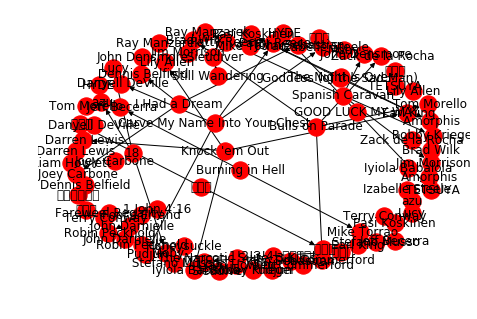

In [72]:
master_graph = nx.MultiDiGraph()
list_edges = []

for work in works[:20]:
#     master_graph.add_nodes_from(str(work['title']).split('  '))        
    for tit in get_list_titular(work['title']):             
        list_edges.append(tuple(str(work['title'] +'   '+  tit ).split('  ')))
        master_graph.add_nodes_from(tit.split('  '))    
master_graph.add_edges_from(list_edges)   

nx.draw(master_graph, with_labels=True)
# plt.show()

In [70]:
list_work_arts = []
for work in works[:10]:    
    for art in get_list_titular(work['title']):
        list_work_arts.append(tuple(str(work['title'] +'   '+  art ).split('  ')))
list_work_arts    
    
    

[('Spanish Caravan', ' John Densmore'),
 ('Spanish Caravan', ' Ray Manzarek'),
 ('Spanish Caravan', ' Robby Krieger'),
 ('Spanish Caravan', ' Jim Morrison'),
 ('1 John 4:16', ' John Darnielle'),
 ('Goddess (of the Sad Man)', ' Pasi Koskinen'),
 ('Goddess (of the Sad Man)', ' Amorphis'),
 ('來生緣', ' 劉德華'),
 ('來生緣', ' 胡偉立'),
 ('Still Wandering', ' Sieudiver'),
 ('The Night Is Over', ' Pasi Koskinen'),
 ('The Night Is Over', ' Amorphis'),
 ('I Had a Dream', ' Dennis Belfield'),
 ('I Had a Dream', ' Joey Carbone'),
 ('I Had a Dream', ' John Sebastian'),
 ('Fareweel Regality', ' Terry Conway'),
 ('Fool’s Errand', ' Robin Pecknold')]

In [73]:
master_graph.nodes(data=True)

NodeDataView({'John Densmore': {}, 'Ray Manzarek': {}, 'Robby Krieger': {}, 'Jim Morrison': {}, 'John Darnielle': {}, 'Pasi Koskinen': {}, 'Amorphis': {}, '劉德華': {}, '胡偉立': {}, 'Sieudiver': {}, 'Dennis Belfield': {}, 'Joey Carbone': {}, 'John Sebastian': {}, 'Terry Conway': {}, 'Robin Pecknold': {}, 'Pudjun': {}, 'Izabelle Steele': {}, 'Patty Reece': {}, 'Danyell DeVille': {}, 'TETSUYA': {}, 'HYDE': {}, 'Tim Commerford': {}, 'Tom Morello': {}, 'Brad Wilk': {}, 'Zack de la Rocha': {}, 'Iyiola Babalola': {}, 'Darren Lewis': {}, 'Lily Allen': {}, 'Earl King': {}, 'Stefano Musso': {}, '秋元康': {}, 'ツキダタダシ': {}, 'Moby': {}, 'Lucy': {}, 'azu': {}, 'Mike Torrao': {}, 'Jeff Becerra': {}, 'Liam Howlett': {}, 'Spanish Caravan': {}, ' John Densmore': {}, ' Ray Manzarek': {}, ' Robby Krieger': {}, ' Jim Morrison': {}, '1 John 4:16': {}, ' John Darnielle': {}, 'Goddess (of the Sad Man)': {}, ' Pasi Koskinen': {}, ' Amorphis': {}, '來生緣': {}, ' 劉德華': {}, ' 胡偉立': {}, 'Still Wandering': {}, ' Sieudiver':

In [34]:
len(master_graph.edges())
len(master_graph.node())

94

In [74]:
master_graph.edges()

OutMultiEdgeDataView([('Spanish Caravan', ' John Densmore'), ('Spanish Caravan', ' Ray Manzarek'), ('Spanish Caravan', ' Robby Krieger'), ('Spanish Caravan', ' Jim Morrison'), ('1 John 4:16', ' John Darnielle'), ('Goddess (of the Sad Man)', ' Pasi Koskinen'), ('Goddess (of the Sad Man)', ' Amorphis'), ('來生緣', ' 劉德華'), ('來生緣', ' 胡偉立'), ('Still Wandering', ' Sieudiver'), ('The Night Is Over', ' Pasi Koskinen'), ('The Night Is Over', ' Amorphis'), ('I Had a Dream', ' Dennis Belfield'), ('I Had a Dream', ' Joey Carbone'), ('I Had a Dream', ' John Sebastian'), ('Fareweel Regality', ' Terry Conway'), ('Fool’s Errand', ' Robin Pecknold'), ('Carve My Name Into Your Chest', ' Pudjun'), ('Carve My Name Into Your Chest', ' Izabelle Steele'), ('Carve My Name Into Your Chest', ' Patty Reece'), ('Carve My Name Into Your Chest', ' Danyell DeVille'), ('GOOD LUCK MY WAY', ' TETSUYA'), ('GOOD LUCK MY WAY', ' HYDE'), ('Bulls on Parade', ' Tim Commerford'), ('Bulls on Parade', ' Tom Morello'), ('Bulls on 

In [75]:
recorded_graph = extract_recorded_graph(master_graph)

In [76]:
played_with_graph = extract_played_with_graph(master_graph)
print(played_with_graph)

In [79]:
top_10, degrees = top_10_recorders(master_graph, graph)
print(top_10)

['Spanish Caravan', 'Carve My Name Into Your Chest', 'Bulls on Parade', "Knock 'em Out", 'I Had a Dream', '18', 'Goddess (of the Sad Man)', ' Pasi Koskinen', ' Amorphis', '來生緣']


In [80]:
cprint("##### Top 10 Prolific Musicians", 'yellow')
for i, node in enumerate(top_10[:10]):
#     data = graph.node[node]    
#     cprint("{}) {} / score: {}".format(i + 1, '{} - {}'.format(data['name'], instruments), side[node]), 'white')
#     cprint("{}) {} / score: {}".format(i + 1, '{} - {}'.format(data), side[node]), 'white')
    print(node)
    

##### Top 10 Prolific Musicians
Spanish Caravan
Carve My Name Into Your Chest
Bulls on Parade
Knock 'em Out
I Had a Dream
18
Goddess (of the Sad Man)
 Pasi Koskinen
 Amorphis
來生緣
